In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.vis_utils import plot_model

import os

In [2]:
# !pip install nltk
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal

True

In [3]:
file="Food_Review_dataset.csv"
import pandas as pd
df= pd.read_csv(file,encoding='unicode_escape')
print(df.shape)

(239060, 31)


C:\Users\hkmeh\AppData\Local\Temp\ipykernel_16256\4109756930.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(file,encoding='unicode_escape')


In [4]:
df.head()

,Unnamed: 0,uuid,createdAt,updatedAt,text,isAnonymous,reviewerName,reviewerId,ratings_overall,labels,...,longitude,primary_cuisine,primary_cuisine_id,cuisines,review_number,restaurant_overall_rating,hero_image,hero_listing_image,vertical_type_ids,web_path
0,0,5fc60466-9915-4228-a62a-788e4e1f9309,2023-06-07T18:01:48Z,2023-06-07T18:01:48Z,Food taste was delicious but delivery time was...,False,RAQIB,5fc60466-9915-4228-a62a-788e4e1f9309,4,3,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
1,1,e688eb38-30d8-49eb-965b-a472a1699542,2023-06-05T10:51:48Z,2023-06-05T10:51:48Z,The food was good,False,NUR,e688eb38-30d8-49eb-965b-a472a1699542,5,3,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
2,2,b2eabe8e-ac1f-4391-90ea-ea71f0d7d95f,2023-06-03T17:00:40Z,2023-06-03T17:00:40Z,While ordering I told them to make the food le...,False,MARIA,bdf168fb,1,1,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
3,3,2da3f861-63e8-426d-a4a4-baa1becbeb94,2023-05-23T12:07:28Z,2023-05-23T12:07:28Z,Food was good as my expectation.,False,SHARIFUL,2da3f861-63e8-426d-a4a4-baa1becbeb94,5,3,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
4,4,8da86b37-a44f-489b-a659-2ee2444ee27f,2023-05-12T05:42:54Z,2023-05-12T05:42:54Z,Your service and food quality has become so ut...,False,ZANNATUL,8da86b37-a44f-489b-a659-2ee2444ee27f,1,1,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239060 entries, 0 to 239059
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 239060 non-null  int64  
 1   uuid                       239060 non-null  object 
 2   createdAt                  239060 non-null  object 
 3   updatedAt                  239060 non-null  object 
 4   text                       238304 non-null  object 
 5   isAnonymous                239060 non-null  bool   
 6   reviewerName               239039 non-null  object 
 7   reviewerId                 239060 non-null  object 
 8   ratings_overall            239060 non-null  int64  
 9   labels                     239060 non-null  int64  
 10  ratings                    239060 non-null  object 
 11  type                       239060 non-null  object 
 12  likeCount                  239060 non-null  int64  
 13  isLiked                    23

In [6]:
df.isnull().sum()

Unnamed: 0                     0
uuid                           0
createdAt                      0
updatedAt                      0
text                         756
isAnonymous                    0
reviewerName                  21
reviewerId                     0
ratings_overall                0
labels                         0
ratings                        0
type                           0
likeCount                      0
isLiked                        0
id                             0
code                           0
name                           0
address                        0
city                           0
post_code                      0
latitude                       0
longitude                      0
primary_cuisine                0
primary_cuisine_id             0
cuisines                       0
review_number                  0
restaurant_overall_rating      0
hero_image                     0
hero_listing_image             0
vertical_type_ids              0
web_path  

In [7]:
df = df.dropna(how='any',axis=0) 

In [8]:
df.loc[1:10, ['text','reviewerName', 'ratings_overall','labels']]

,text,reviewerName,ratings_overall,labels
1,The food was good,NUR,5,3
2,While ordering I told them to make the food le...,MARIA,1,1
3,Food was good as my expectation.,SHARIFUL,5,3
4,Your service and food quality has become so ut...,ZANNATUL,1,1
5,Good,RAHAT,5,3
6,The match was good but the kaljira bharta of m...,SHAHABUDDIN,3,2
7,Usual taste but neat presentation.,FARHIN,4,3
8,The portion has decreased a lot. It's now a t...,FARIHA,3,2
9,My orders from this kitchen are always fresh ...,ZANNATUL,5,3
10,"Food was really good. I ordered rice, fish, d...",ZANNATUL,4,3


In [9]:
df['labels'].value_counts()

labels
1    115712
3     93189
2     29382
Name: count, dtype: int64

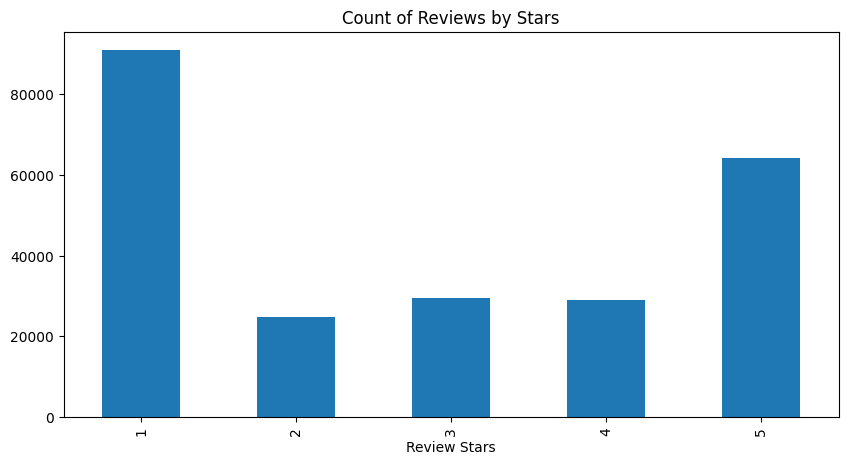

In [10]:
ax = df["ratings_overall"].value_counts().sort_index().plot(kind="bar", title="Count of Reviews by Stars", figsize=(10,5))

ax.set_xlabel('Review Stars')
plt.savefig('stars.pdf')
plt.show()

In [11]:
df['labels'].unique()

array([3, 1, 2], dtype=int64)

<Axes: xlabel='labels'>

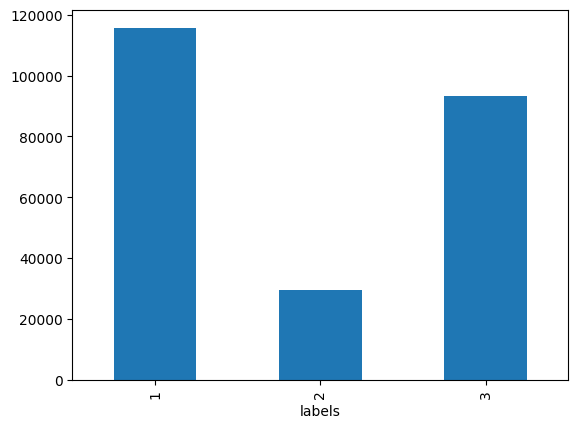

In [12]:
df_groups = df.groupby(['labels'])['text'].count()
df_groups.plot(kind='bar')

In [13]:
df[df['labels']==1]

,Unnamed: 0,uuid,createdAt,updatedAt,text,isAnonymous,reviewerName,reviewerId,ratings_overall,labels,...,longitude,primary_cuisine,primary_cuisine_id,cuisines,review_number,restaurant_overall_rating,hero_image,hero_listing_image,vertical_type_ids,web_path
2,2,b2eabe8e-ac1f-4391-90ea-ea71f0d7d95f,2023-06-03T17:00:40Z,2023-06-03T17:00:40Z,While ordering I told them to make the food le...,False,MARIA,bdf168fb,1,1,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
4,4,8da86b37-a44f-489b-a659-2ee2444ee27f,2023-05-12T05:42:54Z,2023-05-12T05:42:54Z,Your service and food quality has become so ut...,False,ZANNATUL,8da86b37-a44f-489b-a659-2ee2444ee27f,1,1,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
11,11,486e6a37-f516-4318-9d4f-2277215c7e44,2023-04-23T12:22:26Z,2023-04-23T12:22:26Z,Abominable thing! 361 rupees wasted. No one wi...,False,ABDULLAH,486e6a37-f516-4318-9d4f-2277215c7e44,1,1,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
24,24,df5018c1-e14d-4773-b70a-2c544acc529a,2023-02-13T08:23:49Z,2023-02-13T08:23:49Z,Worst food supplier,False,SHAIM,df5018c1-e14d-4773-b70a-2c544acc529a,1,1,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
25,25,6d8beb5d-3c4b-4d85-9f2a-5446f0348f0f,2023-02-07T16:01:18Z,2023-02-07T16:01:18Z,Beef was very oily and I think they give huge ...,False,MARIA,6d8beb5d-3c4b-4d85-9f2a-5446f0348f0f,1,1,...,90.391680,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239054,239057,65983676-fe3d-48a0-93a1-19d6fb1dc39b,2022-08-12T14:02:26Z,2022-08-12T14:02:26Z,Alhamdulillah is good,False,SK,bdteact2,1,1,...,90.386578,Beverage,86,"['Beverage', 'Pizza', 'Burgers', 'Fast Food']",85,3.0,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/zyx2/janna...
239055,239058,77547bb7-a58b-4b12-97cd-189a2dc5b7c1,2022-07-30T05:33:47Z,2022-07-30T05:33:47Z,"Very poor taste, late delivery, no chicken on...",False,ANANNYA,bdyae6ym,1,1,...,90.386578,Beverage,86,"['Beverage', 'Pizza', 'Burgers', 'Fast Food']",85,3.0,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/zyx2/janna...
239056,239059,82bef771-cb60-4dc1-8b64-e97d3d2cdc44,2022-07-17T11:01:47Z,2022-07-17T11:01:47Z,totally bad,False,SHIRSHENDU,bd686svs,1,1,...,90.386578,Beverage,86,"['Beverage', 'Pizza', 'Burgers', 'Fast Food']",85,3.0,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,['restaurants'],https://foodpanda.com.bd/restaurant/zyx2/janna...
239057,239060,49662e22-c372-4ae5-9252-7d22d3eaa57d,2022-07-15T17:39:21Z,2022-07-15T17:39:21Z,ami ja order korsi ta painai ar food er taste...,False,RAMISHA,bdj1w3vo,1,1,...,90.386578,Beverage,86,"['Beverage', 'Pizza', 'Burg

In [14]:
df.iloc[0]['text']

'Food taste was delicious but delivery time was extremely high.'

In [15]:
df.iloc[1118]['text']

'Meatbox was very dry. . Lower portion compared to previous orders'

In [16]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# Text preprocessing

In [17]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
#     text = [word for word in text.split(' ') if word not in stopword]
#     text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
    return text

In [18]:
df['text']=df['text'].apply(clean_text)

In [19]:
df.iloc[0]['text']

'food taste was delicious but delivery time was extremely high'

In [20]:
df.iloc[1118]['text']

'meatbox was very dry  lower portion compared to previous orders'

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df.iloc[0]

Unnamed: 0                                                                   0
uuid                                      5fc60466-9915-4228-a62a-788e4e1f9309
createdAt                                                 2023-06-07T18:01:48Z
updatedAt                                                 2023-06-07T18:01:48Z
text                         food taste was delicious but delivery time was...
isAnonymous                                                              False
reviewerName                                                             RAQIB
reviewerId                                5fc60466-9915-4228-a62a-788e4e1f9309
ratings_overall                                                              4
labels                                                                       3
ratings                      [{'topic': 'overall', 'score': 4}, {'topic': '...
type                                                                      user
likeCount                                           

df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

df.groupby(['labels', 'data_type']).count()

df_train = df.loc[df["data_type"]=="train"]
df_train.head(5)

df_val = df.loc[df["data_type"]=="val"]
df_val.head(5)

df_test = df.loc[df["data_type"]=="test"]
df_test.head(5)

# World Cloud for bad reviews (labels==1)

<class 'set'>


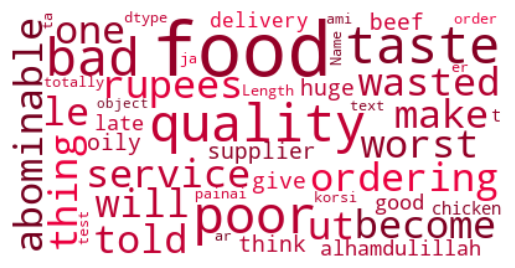

In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("RT")

print(type(STOPWORDS))

import random

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(df.loc[df["labels"]==1].text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
# #World Cloud for neutral reviews (labels==2)

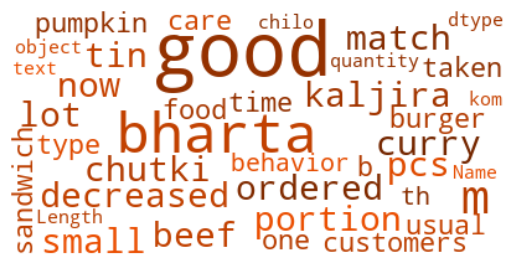

In [25]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 20
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str((df.loc[df["labels"]==2].text)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

# World Cloud for good reviews (labels==3)

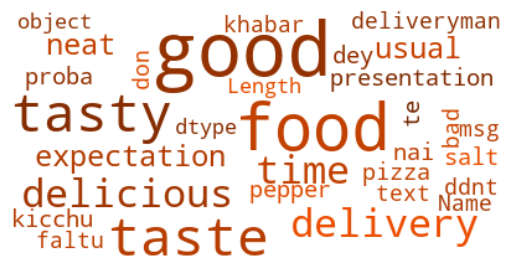

In [26]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 20
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str((df.loc[df["labels"]==3].text)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

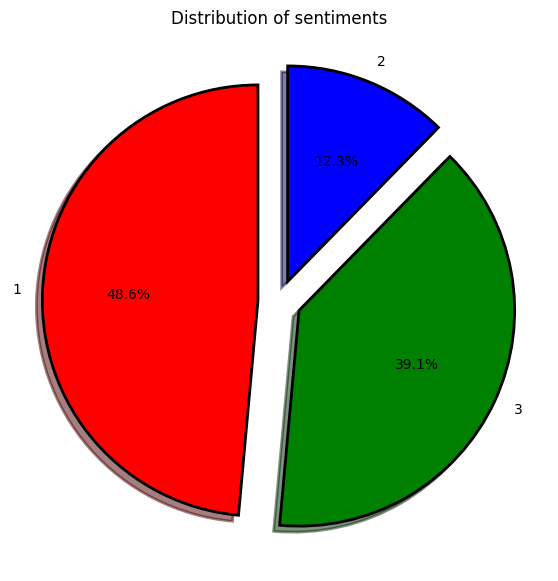

In [27]:
# visualizing data using piechart
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':2, "edgecolor":'black'}
tags = df['labels'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")

#here 1 bad, 2 neutral & 3 good

In [28]:
bad = df[df.labels==1]

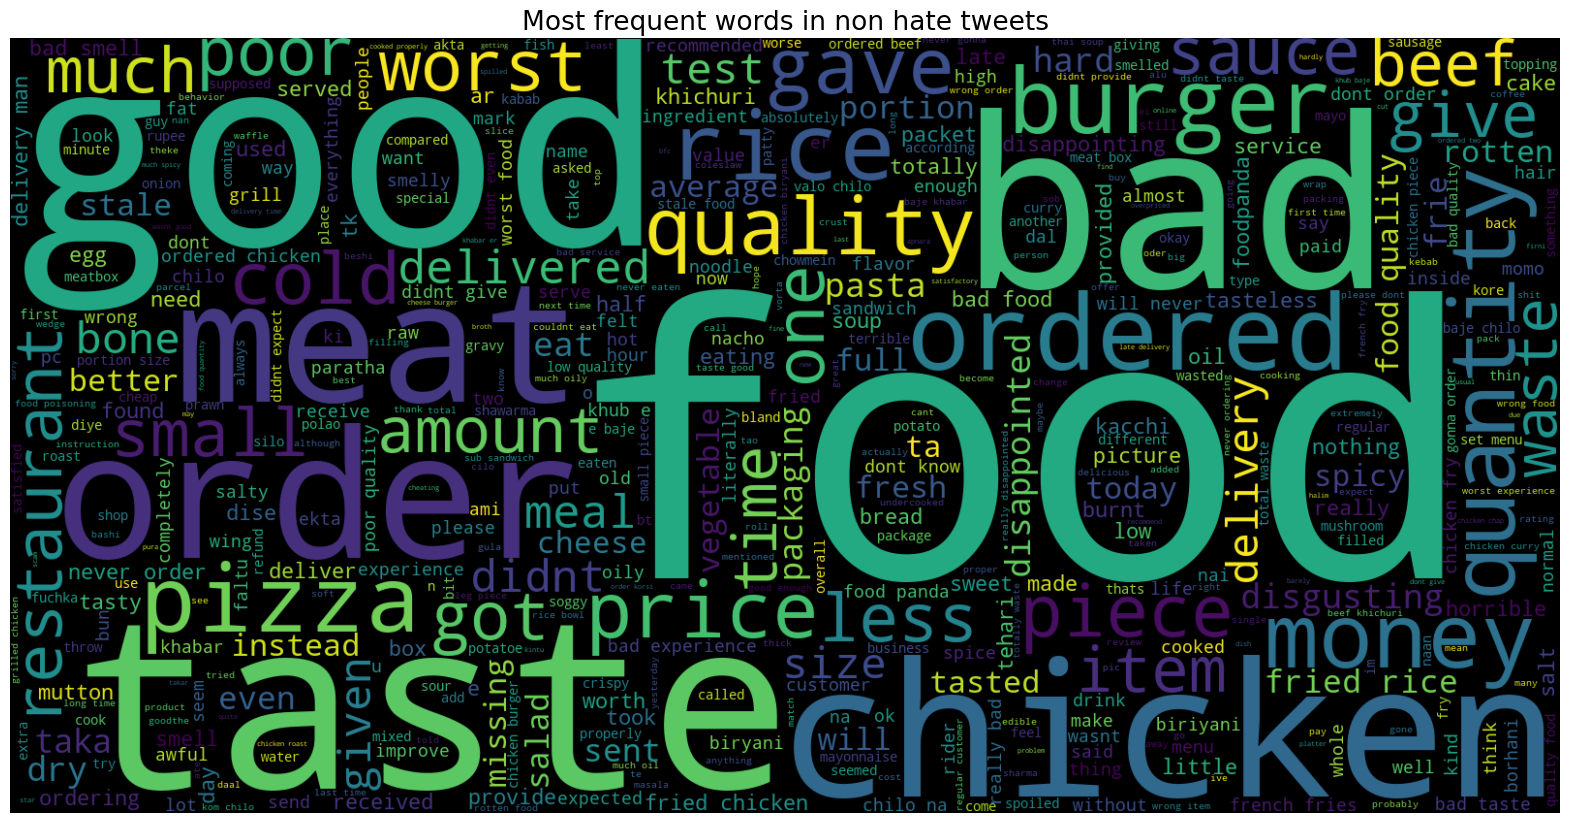

In [29]:
# visualizing non-hate tweets using word cloud
text=''.join([word for word in bad['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in non hate tweets", fontsize=19)
plt.show()

In [30]:
def get_summary(df):   

    content = df["text"].values        
    word_tok = [word.lower() for item in content for word in nltk.word_tokenize(item)]    
    st_words = set(word_tok)   
    
    fact = {
        "TotalCount": len(content),
        "TotalWords": len(word_tok),        
        "TotalUniqueWords": len(st_words),
        "MeanWordsPerTweet": len(word_tok) / len(content),
    }

    return fact, df.describe()

In [31]:
f, s = get_summary(df)
s

,Unnamed: 0,ratings_overall,labels,likeCount,id,latitude,longitude,primary_cuisine_id,review_number,restaurant_overall_rating
count,238283.000000,238283.000000,238283.000000,238283.000000,238283.000000,238283.000000,238283.000000,238283.000000,238283.000000,238283.000000
mean,119536.712048,2.793233,1.905478,0.180130,29557.313052,23.650966,90.648832,126.547572,3468.160788,3.745481
std,69010.038851,1.669687,0.931537,0.563203,21678.524235,0.556725,0.551907,55.941006,5105.125449,0.454524
min,0.000000,1.000000,1.000000,-2.000000,3.000000,22.270562,90.210323,0.000000,0.000000,0.000000
25%,59771.500000,1.000000,1.000000,0.000000,8476.000000,23.740346,90.371804,85.000000,380.000000,3.500000
50%,119535.000000,3.000000,2.000000,0.000000,25923.000000,23.769280,90.405873,86.000000,1314.000000,3.800000
75%,179300.500000,5.000000,3.000000,0.000000,49896.000000,23.810376,90.428714,193.000000,4150.000000,4.100000
max,239062.000000,5.000000,3.000000,51.000000,66278.000000,24.919806,91.910593,249.000000,27719.000000,5.000000


In [32]:
f

{'TotalCount': 238283,
 'TotalWords': 2546831,
 'TotalUniqueWords': 40989,
 'MeanWordsPerTweet': 10.688261437030757}

x=df['text']
y=df['labels']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

from sklearn.model_selection import train_test_split

X_train_, X_test, y_train_, y_test = train_test_split(
    x,
    y,
    test_size=0.10,
    random_state=42,
        
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train_,
    X_train_,
    test_size=0.10,
    random_state=42,
    
)

print("Size of X_train", (X_train_.shape))
print("Size of y_train", (y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of y_test", (y_test.shape))
print("Size of X_val", (X_val.shape))
print("Size of y_val", (y_val.shape))

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
doc=np.array(df['text'])

In [34]:
bag=vect.fit_transform(doc)

In [35]:
print(vect.vocabulary_)

{'food': 13740, 'taste': 36403, 'was': 39767, 'delicious': 9658, 'but': 5657, 'delivery': 9699, 'time': 37470, 'extremely': 12823, 'high': 16279, 'the': 37015, 'good': 15063, 'while': 40029, 'ordering': 27220, 'told': 37684, 'them': 37077, 'to': 37584, 'make': 22999, 'less': 22194, 'spicy': 35095, 'they': 37117, 'did': 10346, 'not': 26280, 'listen': 22409, 'me': 23598, 'and': 1387, 'so': 34555, 'like': 22323, 'anything': 1513, 'very': 39252, 'disappointing': 10612, 'as': 1831, 'my': 25212, 'expectation': 12715, 'your': 40640, 'service': 33161, 'quality': 30607, 'has': 16010, 'become': 3415, 'utterly': 38781, 'nowadays': 26335, 'worst': 40291, 'packaging': 27735, 'tk': 37546, 'worth': 40316, 'of': 26596, 'rice': 31752, 'chicken': 6805, 'curry': 8814, 'spilled': 35114, 'all': 992, 'went': 39962, 'waste': 39808, 'you': 40630, 'lost': 22621, 'regular': 31331, 'customer': 8847, 'match': 23464, 'kaljira': 19196, 'bharta': 3920, 'order': 27198, 'arrive': 1809, 'usual': 38743, 'neat': 25654, '

In [36]:
print(len(vect.vocabulary_))

40841


In [37]:
# print(bag.toarray())

In [38]:
r=np.array(df['text'].values).reshape(-1,1)

In [39]:
r.shape

(238283, 1)

In [40]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['text'])
bow.shape

(238283, 1000)

# TF-IDF Vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['text'])
tfidf.shape

(238283, 17353)

In [42]:
y=df['labels'].values
X_train, X_test, Y_train, Y_test = train_test_split(tfidf, y, test_size=0.25, random_state=42)
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (178712, 17353)
Size of Y_train (178712,)
Size of X_test (59571, 17353)
Size of Y_test (59571,)


# Decision Tree

In [43]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)
score = dt.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.7130986553860099


In [44]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = dt.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y))

Accuracy: 0.7130986553860099

 Clasification report:
               precision    recall  f1-score   support

           1       0.77      0.78      0.78     28968
           2       0.26      0.18      0.22      7414
           3       0.74      0.80      0.76     23189

    accuracy                           0.71     59571
   macro avg       0.59      0.59      0.59     59571
weighted avg       0.70      0.71      0.70     59571



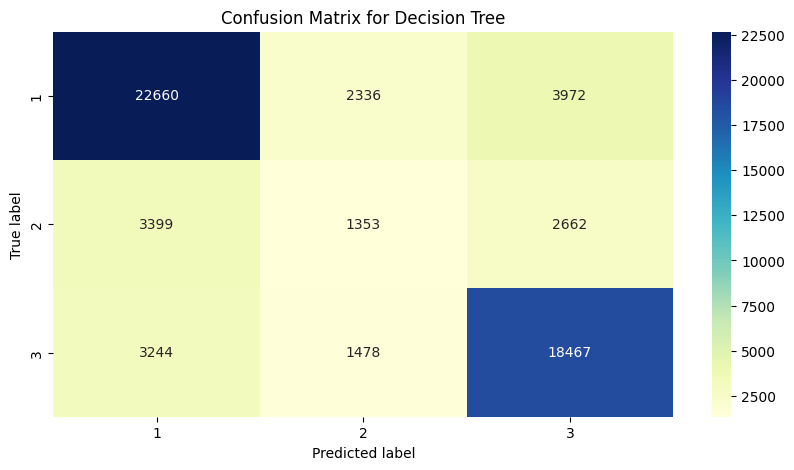

In [45]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Decision Tree')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100 )
lr=lr.fit(X_train, Y_train)
score = lr.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.7630894227056789


C:\Users\hkmeh\anaconda3\envs\tf-nlp\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = lr.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y))

Accuracy: 0.7630894227056789

 Clasification report:
               precision    recall  f1-score   support

           1       0.77      0.88      0.82     28968
           2       0.41      0.11      0.17      7414
           3       0.78      0.83      0.80     23189

    accuracy                           0.76     59571
   macro avg       0.65      0.60      0.60     59571
weighted avg       0.73      0.76      0.73     59571



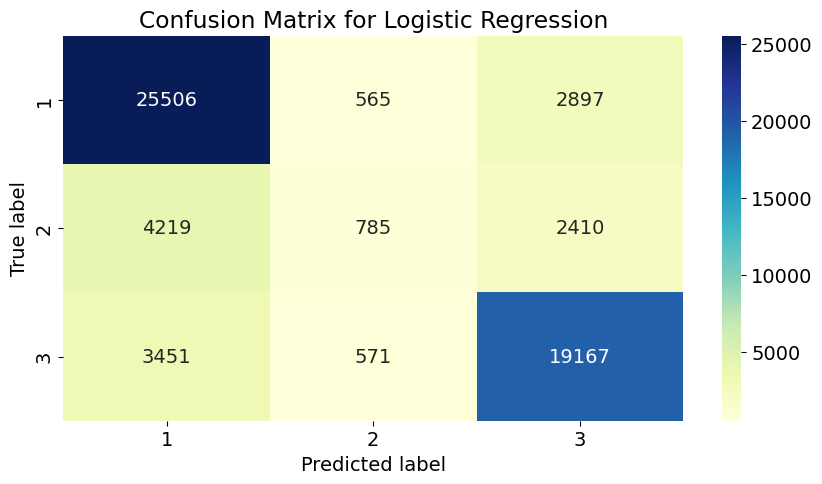

In [48]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Logistic Regression')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
 
rf= RandomForestClassifier(n_estimators=500, max_depth=10, random_state=0)
rf = rf.fit(X_train, Y_train)
score = rf.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.5357136861895889


In [50]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = rf.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y))

Accuracy: 0.5357136861895889

 Clasification report:
               precision    recall  f1-score   support

           1       0.51      1.00      0.68     28968
           2       0.00      0.00      0.00      7414
           3       0.93      0.13      0.23     23189

    accuracy                           0.54     59571
   macro avg       0.48      0.38      0.30     59571
weighted avg       0.61      0.54      0.42     59571



C:\Users\hkmeh\anaconda3\envs\tf-nlp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hkmeh\anaconda3\envs\tf-nlp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hkmeh\anaconda3\envs\tf-nlp\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


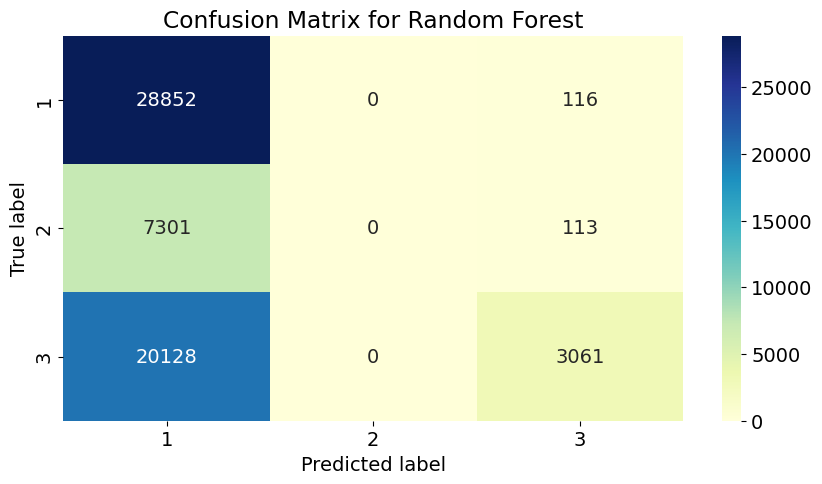

In [51]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Random Forest')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# SVM

In [52]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
svm = LinearSVC()
sv= CalibratedClassifierCV(svm) 
sv = sv.fit(X_train, Y_train)  
score =sv.score(X_test, Y_test)
print("Accuracy:", score)

C:\Users\hkmeh\anaconda3\envs\tf-nlp\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkmeh\anaconda3\envs\tf-nlp\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkmeh\anaconda3\envs\tf-nlp\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkmeh\anaconda3\envs\tf-nlp\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkm

Accuracy: 0.7594970707223313


In [53]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = sv.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y))

Accuracy: 0.7594970707223313

 Clasification report:
               precision    recall  f1-score   support

           1       0.77      0.88      0.82     28968
           2       0.40      0.09      0.14      7414
           3       0.77      0.83      0.80     23189

    accuracy                           0.76     59571
   macro avg       0.65      0.60      0.59     59571
weighted avg       0.72      0.76      0.73     59571



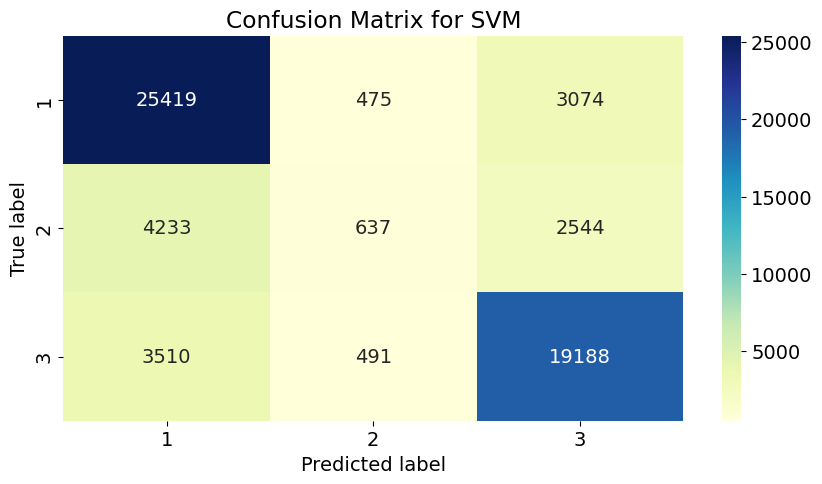

In [54]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for SVM')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Naive Bayes

In [55]:
from sklearn import model_selection, naive_bayes, svm
nb = naive_bayes.MultinomialNB()
nb = nb.fit(X_train, Y_train) 
score = nb.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.754058182672777


In [56]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = nb.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y))

Accuracy: 0.754058182672777

 Clasification report:
               precision    recall  f1-score   support

           1       0.74      0.90      0.81     28968
           2       0.44      0.04      0.07      7414
           3       0.78      0.81      0.79     23189

    accuracy                           0.75     59571
   macro avg       0.65      0.58      0.56     59571
weighted avg       0.72      0.75      0.71     59571



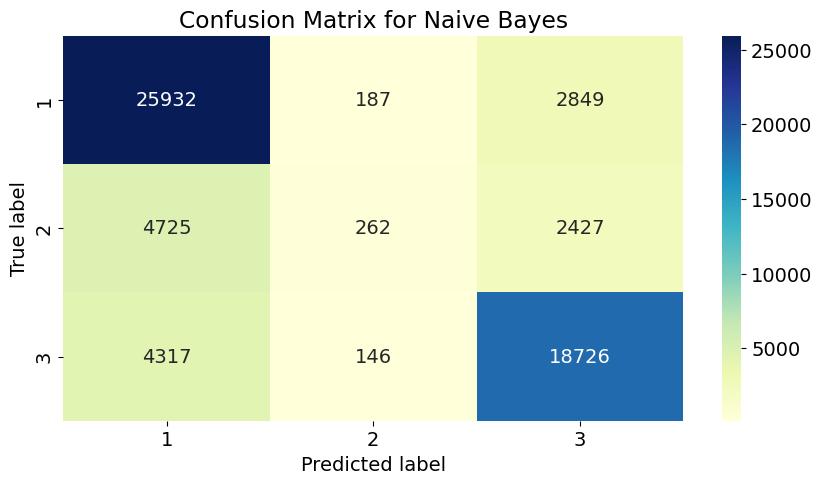

In [57]:
cm = confusion_matrix(Y_test, pred_y) 
classes = np.array([1,2,3])


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Naive Bayes')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()